In [1]:
#http://worldpopulationreview.com/us-cities/memphis-population/
memphis_pop = 670000
#http://www.acphd.org/media/53459/eoakland05.pdf
oakland_pop = 87943
#https://www.census.gov/quickfacts/fact/table/marincountycalifornia/PST045217#PST045217
marin_pop = 260955


In [2]:
user = "atwater"
apikey = {'atwater':"ekh9KVmwQxokFmje0yDKJsSdG5PCuxWpXphJMEB3"}
age_list = ["C 1-3", "F 4-8", "M 4-8", "F 9-13", "M 9-13", "F 14-18", "M 14-18", "F 19-30", "M 19-30",\
            "F 31-50", "M 31-50", "F 51+", "M 51+"]
#http://www.censusscope.org/us/chart_age.html
age_breakdown = [6.82, 3.56, 3.74, 3.56, 3.74, 3.49, 3.69, 6.71, 6.92,\
                15.32, 15.15, 15.01, 12.32]
    
    
import ndb

## Memphis

In [3]:
SHEETs = [# Memphis all food
          ("https://docs.google.com/spreadsheet/ccc?key=1dn6IF5Ar_Hf_l0buhs9yIo6g1gqnGZqB6WLmQNotPcY","Memphis"), 
         ]

In [4]:
import ndb
import pandas as pd
import warnings

DFs = []
#for csv in CSVs:  # Uncomment to use a list of csv files as inputs
#  DFs.append(pd.read_csv(csv,dtype=str))

try:
    if len(SHEETs):
        for ID, RANGE_NAME in SHEETs:
            try:
                if "docs.google.com" in ID:
                    sheet = "%s&output=csv" % ID
                else:
                    sheet = "https://docs.google.com/spreadsheet/ccc?key=%s&output=csv" % ID
                DFs.append(pd.read_csv(sheet))
            except ParserError:
                warnings.warn("Can't read sheet at https://docs.google.com/spreadsheets/d/%s.\nCheck Sharing settings, so that anyone with link can view?" % ID)
except NameError: # SHEETS not defined?
    pass

df = pd.concat(DFs,ignore_index=True,sort=False)
# Some columns which ought to be numeric are actually str; convert them
df['Price'] = df['Price'].astype(float)
df['Quantity'] = df['Quantity'].astype(float)
df["Units"] = df["Units"].astype(str)
df["NDB"][df['Food'].str.contains("Wheat Pasta")] = str(45051131)

df

/srv/app/venv/lib/python3.6/site-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Food,Quantity,Units,Price,Date,Location,NDB,Notes,Unnamed: 8
0,Wheat Pasta,16.00,oz,1.25,02/20/2019,Aldi,45051131,NaN,https://www.instacart.com/store/aldi/search_v3...
1,Wheat Cereal,18.00,oz,2.54,02/20/2019,Memphis Cash Saver,45175158,NaN,NaN
2,Corn Meal,5.00,lb,2.74,02/20/2019,Memphis Cash Saver,45211519,NaN,NaN
3,Rolled Oats,1.00,oz,3.28,02/20/2019,Memphis Cash Saver,45339980,NaN,NaN
4,Potatoes (Russet),1.00,lb,0.47,02/20/2019,Memphis Cash Saver,45274916,NaN,NaN
5,Spinach,10.00,oz,1.05,02/20/2019,Memphis Cash Saver,11464,NaN,NaN
6,Sweet Potatoes,1.00,lb,0.33,02/20/2019,Memphis Cash Saver,11510,NaN,NaN
7,Sugar,4.00,lb,2.45,02/20/2019,Memphis Cash Saver,19335,NaN,NaN
8,Beets,15.00,oz,0.66,02/20/2019,Memphis Cash Saver,45187703,NaN,NaN
9,Milk (Whole),128.00,oz,2.98,02/20/2019,Memphis Cash Saver,45274042,NaN,NaN


In [5]:
D = {}
for food in  df.Food.tolist():
    try:
        NDB = df.loc[df.Food==food,:].NDB
        D[food] = ndb.ndb_report(apikey[user],NDB).Quantity
    except AttributeError: 
        warnings.warn("Couldn't find NDB Code %s for food %s." % (food,NDB))
        

D = pd.DataFrame(D,dtype=float)

D

,Wheat Pasta,Wheat Cereal,Corn Meal,Rolled Oats,Potatoes (Russet),Spinach,Sweet Potatoes,Sugar,Beets,Milk (Whole),...,Peanut butter (smooth),Whey protein,Butter (unsalted),Green beans,Avocado,Blueberries,Ground beef,Chicken breast,Quinoa,Butternut Squash
Caffeine,NaN,NaN,NaN,NaN,NaN,0.000,0.000,0.000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.000,NaN,NaN,0.000,0.000
"Calcium, Ca",0.00,36.000,0.00,0.00,38.00,153.000,27.000,1.000,0.00,104.00,...,NaN,476.00,0.0,47.00,13.000,6.000,0.00,0.00,17.000,15.000
"Carbohydrate, by difference",75.00,80.000,76.67,67.50,8.86,4.800,17.720,99.980,15.29,5.00,...,10.00,11.90,0.0,7.06,8.640,14.490,0.00,0.00,21.300,3.350
Cholesterol,0.00,0.000,0.00,0.00,0.00,0.000,0.000,0.000,0.00,15.00,...,0.00,238.00,300.0,0.00,0.000,0.000,67.00,76.00,0.000,0.000
Energy,375.00,364.000,367.00,375.00,38.00,34.000,76.000,387.000,53.00,62.00,...,567.00,381.00,900.0,29.00,167.000,57.000,179.00,129.00,120.000,16.000
"Fatty acids, total monounsaturated",NaN,0.000,0.00,2.50,NaN,0.000,0.000,0.000,NaN,NaN,...,NaN,NaN,NaN,NaN,9.799,0.047,NaN,NaN,0.528,0.016
"Fatty acids, total polyunsaturated",NaN,0.910,0.00,2.50,NaN,0.371,0.061,0.000,NaN,NaN,...,NaN,NaN,4.0,NaN,1.816,0.146,NaN,NaN,1.078,0.089
"Fatty acids, total saturated",0.00,0.000,0.00,1.25,0.00,0.157,0.031,0.000,0.00,2.08,...,3.33,3.57,60.0,0.00,2.126,0.028,4.02,0.00,0.231,0.044
"Fatty acids, total trans",0.00,0.000,0.00,0.00,0.00,0.000,0.000,NaN,0.00,0.00,...,0.00,0.00,0.0,0.00,0.000,0.000,NaN,0.00,NaN,0.000
"Fiber, total dietary",3.60,12.700,6.70,10.00,0.60,3.700,2.500,0.000,2.40,0.00,...,6.70,2.40,0.0,2.40,6.800,2.400,0.00,0.00,2.800,1.100


## Units & Prices



Now, the prices we observe can be for lots of different quantities and
units.  The NDB database basically wants everything in either hundreds
of grams (hectograms) or hundreds of milliliters (deciliters).  

Sometimes this conversion is simple; if the price we observe is for
something that weighs two kilograms, that&rsquo;s just 20 hectograms.
Different systems of weights and volumes are also easy; a five pound
bag of flour is approximately 22.68 hectograms.  

Othertimes things are more complicated.  If you observe the price of a
dozen donuts, that needs to be converted to hectograms, for example.  

A function `ndb_units` in the [ndb](ndb.py) module accomplishes this conversion
for many different units, using the `python` [pint module](https://pint.readthedocs.io/en/latest/).  A file
[./Data/food\_units.txt](Data/food_units.txt) can be edited to deal with odd cases such as
donuts, using a format described in the `pint` [documentation](https://pint.readthedocs.io/en/latest/defining.html). 

Here&rsquo;s an example of the usage of `ndb.ndb_units`:



Now, use the `ndb_units` function to convert all foods to either
deciliters or hectograms, to match NDB database:



In [6]:
# Convert food quantities to NDB units
df['NDB Quantity'] = df[['Quantity','Units']].T.apply(lambda x : ndb.ndb_units(x['Quantity'],x['Units']))

# Now may want to filter df by time or place--need to get a unique set of food names.
df['NDB Price'] = df['Price']/df['NDB Quantity']

df.dropna(how='any') # Drop food with any missing data

# To use minimum price observed
Prices = df.groupby('Food')['NDB Price'].min()

Prices.head()

Food
Almonds (unsalted)      0.659182163932784 / hectogram
Avocado                1.0876138267787294 / hectogram
Baby formula            4.287563747049774 / hectogram
Bananas               0.11464037633613633 / hectogram
Beets                  0.1552054325781538 / hectogram
Name: NDB Price, dtype: object

## Dietary Requirements



We&rsquo;ve figured out some foods we can buy, the nutritional content of
those foods, and  the price of the foods.  Now we need to say
something about nutritional requirements.   Our data for this is based
on  US government recommendations available at
[https://health.gov/dietaryguidelines/2015/guidelines/appendix-7/](https://health.gov/dietaryguidelines/2015/guidelines/appendix-7/).
Note that we&rsquo;ve tweaked the nutrient labels to match those in the NDB
data.

We&rsquo;ve broken down the requirements into three different tables.  The
first is *minimum* quantities that we need to  satisfy.  For example,
this table tells us that a 20 year-old female needs at least 46 grams
of protein per day.

| Nutrition|Source|C 1-3|F 4-8|M 4-8|F 9-13|M 9-13|F 14-18|M 14-18|F 19-30|M 19-30|F 31-50|M 31-50|F 51+|M 51+|
|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|
| Energy|---|1000|1200|1400|1600|1800|1800|2200|2000|2400|1800|2200|1600|2000|
| Protein|RDA|13|19|19|34|34|46|52|46|56|46|56|46|56|
| Fiber, total dietary|---|14|16.8|19.6|22.4|25.2|25.2|30.8|28|33.6|25.2|30.8|22.4|28|
| Folate, DFE|RDA|150|200|200|300|300|400|400|400|400|400|400|400|400|
| Calcium, Ca|RDA|700|1000|1000|1300|1300|1300|1300|1000|1000|1000|1000|1200|1000|
| Carbohydrate, by difference|RDA|130|130|130|130|130|130|130|130|130|130|130|130|130|
| Iron, Fe|RDA|7|10|10|8|8|15|11|18|8|18|8|8|8|
| Magnesium, Mg|RDA|80|130|130|240|240|360|410|310|400|320|420|320|420|
| Niacin|RDA|6|8|8|12|12|14|16|14|16|14|16|14|16|
| Phosphorus, P|RDA|460|500|500|1250|1250|1250|1250|700|700|700|700|700|700|
| Potassium, K|AI|3000|3800|3800|4500|4500|4700|4700|4700|4700|4700|4700|4700|4700|
| Riboflavin|RDA|0.5|0.6|0.6|0.9|0.9|1|1.3|1.1|1.3|1.1|1.3|1.1|1.3|
| Thiamin|RDA|0.5|0.6|0.6|0.9|0.9|1|1.2|1.1|1.2|1.1|1.2|1.1|1.2|
| Vitamin A, RAE|RDA|300|400|400|600|600|700|900|700|900|700|900|700|900|
| Vitamin B-12|RDA|0.9|1.2|1.2|1.8|1.8|2.4|2.4|2.4|2.4|2.4|2.4|2.4|2.4|
| Vitamin B-6|RDA|0.5|0.6|0.6|1|1|1.2|1.3|1.3|1.3|1.3|1.3|1.5|1.7|
| Vitamin C, total ascorbic acid|RDA|15|25|25|45|45|65|75|75|90|75|90|75|90|
| Vitamin E (alpha-tocopherol)|RDA|6|7|7|11|11|15|15|15|15|15|15|15|15|
| Vitamin K (phylloquinone)|AI|30|55|55|60|60|75|75|90|120|90|120|90|120|
| Zinc, Zn|RDA|3|5|5|8|8|9|11|8|11|8|11|8|11|
| Vitamin D|RDA|600|600|600|600|600|600|600|600|600|600|600|600|600|

This next table specifies *maximum* quantities.  Our 20 year-old
female shouldn&rsquo;t have more than 2300 milligrams of sodium per day.
Note that we can also add constraints here on nutrients that also
appear above.  For example, here we&rsquo;ve added upper limits on Energy,
as we might do if we were trying to lose weight.

| Nutrition|Source|C 1-3|F 4-8|M 4-8|F 9-13|M 9-13|F 14-18|M 14-18|F 19-30|M 19-30|F 31-50|M 31-50|F 51+|M 51+|
|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|
| Sodium, Na|UL|1500|1900|1900|2200|2200|2300|2300|2300|2300|2300|2300|2300|2300|
| Energy|---|1500|1600|1800|2000|2200|2200|2500|2400|2600|2200|2400|1800|2400|

Finally, we have some odd constraints given in this final table.
Mostly the items given don&rsquo;t correspond to items in the NDB data
(e.g., copper), but in some cases it may be possible to match things
up.  We can&rsquo;t use these without some additional work.

| Nutrition|Source|C 1-3|F 4-8|M 4-8|F 9-13|M 9-13|F 14-18|M 14-18|F 19-30|M 19-30|F 31-50|M 31-50|F 51+|M 51+|
|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|
| Carbohydrate, % kcal|AMDR|45-65|45-65|45-65|45-65|45-65|45-65|45-65|45-65|45-65|45-65|45-65|45-65|45-65|
| Added sugars, % kcal|DGA|<10%|<10%|<10%|<10%|<10%|<10%|<10%|<10%|<10%|<10%|<10%|<10%|<10%|
| Total fat, % kcal|AMDR|30-40|25-35|25-35|25-35|25-35|25-35|25-35|20-35|20-35|20-35|20-35|20-35|20-35|
| Saturated fat, % kcal|DGA|<10%|<10%|<10%|<10%|<10%|<10%|<10%|<10%|<10%|<10%|<10%|<10%|<10%|
| Linoleic acid, g|AI|7|10|10|10|12|11|16|12|17|12|17|11|14|
| Linolenic acid, g|AI|0.7|0.9|0.9|1|1.2|1.1|1.6|1.1|1.6|1.1|1.6|1.1|1.6|
| Copper, mcg|RDA|340|440|440|700|700|890|890|900|900|900|900|900|900|
| Manganese, mg|AI|1.2|1.5|1.5|1.6|1.9|1.6|2.2|1.8|2.3|1.8|2.3|1.8|2.3|
| Selenium, mcg|RDA|20|30|30|40|40|55|55|55|55|55|55|55|55|
| Choline, mg|AI|200|250|250|375|375|400|550|425|550|425|550|425|550|

-   **Notes on Source:** In each of these tables, RDA = Recommended
    Dietary Allowance, AI = Adequate Intake, UL = Tolerable Upper
    Intake Level, AMDR = Acceptable Macronutrient Distribution
    Range, DGA = 2015-2020 Dietary Guidelines recommended limit; 14
    g fiber per 1,000 kcal = basis for AI for fiber.



In [7]:
# Choose sex/age group:
group = "M 19-30"

# Define *minimums*
bmin = pd.read_csv('./diet_minimums.csv').set_index('Nutrition')[group]

# Define *maximums*
bmax = pd.read_csv('./diet_maximums.csv').set_index('Nutrition')[group]

## Putting it together



Here we take the different pieces of the puzzle we&rsquo;ve developed and
put them together in the form of a linear program we can solve.



In [8]:

from  scipy.optimize import linprog as lp
import numpy as np

tol = 1e-6 # Numbers in solution smaller than this (in absolute value) treated as zeros

c = Prices.apply(lambda x:x.magnitude).dropna()

# Compile list that we have both prices and nutritional info for; drop if either missing
use = list(set(c.index.tolist()).intersection(D.columns.tolist()))
c = c[use]

# Drop nutritional information for foods we don't know the price of,
# and replace missing nutrients with zeros.
Aall = D[c.index].fillna(0)

# Drop rows of A that we don't have constraints for.
Amin = Aall.loc[bmin.index]

Amax = Aall.loc[bmax.index]

# Minimum requirements involve multiplying constraint by -1 to make <=.
A = pd.concat([-Amin,Amax])

b = pd.concat([-bmin,bmax]) # Note sign change for min constraints

# Now solve problem!
result = lp(c, A, b, method='interior-point')

# Put back into nice series
diet = pd.Series(result.x,index=c.index)

print("Cost of diet for %s is $%4.2f per day." % (group,result.fun))
print("\nYou'll be eating (in 100s of grams or milliliters):")
print(diet[diet >= tol])  # Drop items with quantities less than precision of calculation.

tab = pd.DataFrame({"Outcome":np.abs(A).dot(diet),"Recommendation":np.abs(b)})
print("\nWith the following nutritional outcomes of interest:")
print(tab)

print("\nConstraining nutrients are:")
excess = tab.diff(axis=1).iloc[:,1]
print(excess.loc[np.abs(excess) < tol].index.tolist())

Cost of diet for M 19-30 is $2.63 per day.

You'll be eating (in 100s of grams or milliliters):
Food
Sweet Potatoes    7.841025
Milk (Whole)      3.780411
Spinach           0.152129
Lentils           0.139082
Bananas           2.506018
Canned tuna       0.316406
Eggs              5.495363
dtype: float64

With the following nutritional outcomes of interest:
                                    Outcome  Recommendation
Nutrition                                                  
Energy                          2599.999979          2400.0
Protein                          115.353672            56.0
Fiber, total dietary              46.463187            33.6
Folate, DFE                      427.022210           400.0
Calcium, Ca                     1000.000002          1000.0
Carbohydrate, by difference      392.573958           130.0
Iron, Fe                          19.787743             8.0
Magnesium, Mg                    506.552678           400.0
Niacin                            16.0000

In [9]:
lowest_price_diet = []
print("The population of Memphis is " + str(memphis_pop))
for age in age_list:
    group = age
    bmin = pd.read_csv('./diet_minimums.csv').set_index('Nutrition')[group]
    bmax = pd.read_csv('./diet_maximums.csv').set_index('Nutrition')[group]
    tol = 1e-6
    c = Prices.apply(lambda x:x.magnitude).dropna()
    use = list(set(c.index.tolist()).intersection(D.columns.tolist()))
    c = c[use]
    Aall = D[c.index].fillna(0)
    Amin = Aall.loc[bmin.index]
    Amax = Aall.loc[bmax.index]
    A = pd.concat([-Amin,Amax])
    b = pd.concat([-bmin,bmax])
    result = lp(c, A, b, method='interior-point')
    diet = pd.Series(result.x,index=c.index)
    lowest_price_diet.append(result.fun)
d = {'Age/Sex Group': age_list, 'Lowest Price Diet ($ / Day)': lowest_price_diet}
total_dataframe = pd.DataFrame(data=d)
total_dataframe = total_dataframe.set_index("Age/Sex Group")
total_dataframe["Population Percentage"] = age_breakdown
total_dataframe["Population Breakdown"] = total_dataframe["Population Percentage"] / 100 * memphis_pop
total_dataframe["Cost per Bucket ($)"] = total_dataframe["Population Breakdown"] * total_dataframe["Lowest Price Diet ($ / Day)"]
total_cost = np.round(sum(total_dataframe["Cost per Bucket ($)"]))
print("The total minimum cost to feed this population is $" + str(total_cost)\
      + " per day and an average cost of $" + str(np.round(total_cost/memphis_pop, 2)) + " per person")
memphis_df = total_dataframe
memphis_df



The population of Memphis is 670000
The total minimum cost to feed this population is $1756233.0 per day and an average cost of $2.62 per person


,Lowest Price Diet ($ / Day),Population Percentage,Population Breakdown,Cost per Bucket ($)
Age/Sex Group,,,,
C 1-3,1.867227,6.82,45694.0,85321.093107
F 4-8,2.315869,3.56,23852.0,55238.100150
M 4-8,2.078878,3.74,25058.0,52092.524772
F 9-13,2.563634,3.56,23852.0,61147.797261
M 9-13,2.470372,3.74,25058.0,61902.577654
F 14-18,2.732120,3.49,23383.0,63885.156531
M 14-18,2.845409,3.69,24723.0,70347.049718
F 19-30,2.549622,6.71,44957.0,114623.339661
M 19-30,2.626779,6.92,46364.0,121787.989446


## East Oakland

In [10]:
SHEETs = [# East Oakland all food
          ("https://docs.google.com/spreadsheet/ccc?key=1IlSfp8sxXsCF_Cut7bq5lucbIGg9A6S2jb2QHjEi-74","Oakland"), 
         ]

In [11]:
import ndb
import pandas as pd
import warnings

DFs = []
#for csv in CSVs:  # Uncomment to use a list of csv files as inputs
#  DFs.append(pd.read_csv(csv,dtype=str))

try:
    if len(SHEETs):
        for ID, RANGE_NAME in SHEETs:
            try:
                if "docs.google.com" in ID:
                    sheet = "%s&output=csv" % ID
                else:
                    sheet = "https://docs.google.com/spreadsheet/ccc?key=%s&output=csv" % ID
                DFs.append(pd.read_csv(sheet))
            except ParserError:
                warnings.warn("Can't read sheet at https://docs.google.com/spreadsheets/d/%s.\nCheck Sharing settings, so that anyone with link can view?" % ID)
except NameError: # SHEETS not defined?
    pass

df = pd.concat(DFs,ignore_index=True,sort=False)
# Some columns which ought to be numeric are actually str; convert them
df['Price'] = df['Price'].astype(float)
df['Quantity'] = df['Quantity'].astype(float)
df["Units"] = df["Units"].astype(str)
df["NDB"][df['Food'].str.contains("Wheat Pasta")] = str(45051131)

df

/srv/app/venv/lib/python3.6/site-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Food,Quantity,Units,Price,Date,Location,NDB,Sources
0,Wheat Pasta,16.0,oz,2.29,2/20,Safeway,45051131,https://www.foodmaxx.com/flyers#/88710/print
1,Wheat Cereal,24.0,oz,6.99,2/20,CVS,45175158,http://weeklyads.cardenasmarkets.com/en/home
2,Corn Meal,5.0,lb,4.59,2/20,Safeway,45211519,http://www.supermercadomitierra.com/oakland.pdf
3,Rolled Oats,18.0,oz,3.99,2/20,CVS,45339980,https://www.instacart.com/store/cvs/search_v3/...
4,Potatoes (Russet),5.0,lb,0.99,2/20,Supermercado Mi Tierra,45274916,https://www.instacart.com/store/village-market...
5,Spinach,16.0,oz,2.89,2/20,Safeway,11464,NaN
6,Sweet Potatoes,1.0,lb,0.69,2/20,Supermercado Mi Tierra,11510,NaN
7,Sugar,4.0,lbs,1.99,2/20,Cardenas,19335,NaN
8,Beets,15.0,oz,1.59,2/20,Safeway,45187703,NaN
9,Milk (Whole),1.0,gallon,2.99,2/20,CVS,45274042,NaN


In [15]:
D = {}
for food in  df.Food.tolist():
    try:
        NDB = df.loc[df.Food==food,:].NDB
        D[food] = ndb.ndb_report(apikey[user],NDB).Quantity
    except AttributeError: 
        warnings.warn("Couldn't find NDB Code %s for food %s." % (food,NDB))
        

D = pd.DataFrame(D,dtype=float)

In [16]:
# Convert food quantities to NDB units
df['NDB Quantity'] = df[['Quantity','Units']].T.apply(lambda x : ndb.ndb_units(x['Quantity'],x['Units']))

# Now may want to filter df by time or place--need to get a unique set of food names.
df['NDB Price'] = df['Price']/df['NDB Quantity']

df.dropna(how='any') # Drop food with any missing data

# To use minimum price observed
Prices = df.groupby('Food')['NDB Price'].min()

In [17]:
# Choose sex/age group:
group = "M 19-30"

# Define *minimums*
bmin = pd.read_csv('./diet_minimums.csv').set_index('Nutrition')[group]

# Define *maximums*
bmax = pd.read_csv('./diet_maximums.csv').set_index('Nutrition')[group]

In [18]:
from  scipy.optimize import linprog as lp
import numpy as np

tol = 1e-6 # Numbers in solution smaller than this (in absolute value) treated as zeros

c = Prices.apply(lambda x:x.magnitude).dropna()

# Compile list that we have both prices and nutritional info for; drop if either missing
use = list(set(c.index.tolist()).intersection(D.columns.tolist()))
c = c[use]

# Drop nutritional information for foods we don't know the price of,
# and replace missing nutrients with zeros.
Aall = D[c.index].fillna(0)

# Drop rows of A that we don't have constraints for.
Amin = Aall.loc[bmin.index]

Amax = Aall.loc[bmax.index]

# Minimum requirements involve multiplying constraint by -1 to make <=.
A = pd.concat([-Amin,Amax])

b = pd.concat([-bmin,bmax]) # Note sign change for min constraints

# Now solve problem!
result = lp(c, A, b, method='interior-point')

# Put back into nice series
diet = pd.Series(result.x,index=c.index)

print("Cost of diet for %s is $%4.2f per day." % (group,result.fun))
print("\nYou'll be eating (in 100s of grams or milliliters):")
print(diet[diet >= tol])  # Drop items with quantities less than precision of calculation.

tab = pd.DataFrame({"Outcome":np.abs(A).dot(diet),"Recommendation":np.abs(b)})
print("\nWith the following nutritional outcomes of interest:")
print(tab)

print("\nConstraining nutrients are:")
excess = tab.diff(axis=1).iloc[:,1]
print(excess.loc[np.abs(excess) < tol].index.tolist())

Cost of diet for M 19-30 is $2.58 per day.

You'll be eating (in 100s of grams or milliliters):
Food
Bananas              3.064393
Spinach              0.055842
Carrots              0.270312
Lentils              0.150945
Butter (unsalted)    0.176204
Baby formula         1.935484
Whey protein         0.284964
dtype: float64

With the following nutritional outcomes of interest:
                                    Outcome  Recommendation
Nutrition                                                  
Energy                          2400.000000          2400.0
Protein                           57.371749            56.0
Fiber, total dietary              33.600000            33.6
Folate, DFE                      400.000000           400.0
Calcium, Ca                     1000.000000          1000.0
Carbohydrate, by difference      395.109858           130.0
Iron, Fe                          22.942314             8.0
Magnesium, Mg                    425.226445           400.0
Niacin              

In [19]:
lowest_price_diet = []
print("The population of East Oakland is " + str(oakland_pop))
for age in age_list:
    group = age
    bmin = pd.read_csv('./diet_minimums.csv').set_index('Nutrition')[group]
    bmax = pd.read_csv('./diet_maximums.csv').set_index('Nutrition')[group]
    tol = 1e-6
    c = Prices.apply(lambda x:x.magnitude).dropna()
    use = list(set(c.index.tolist()).intersection(D.columns.tolist()))
    c = c[use]
    Aall = D[c.index].fillna(0)
    Amin = Aall.loc[bmin.index]
    Amax = Aall.loc[bmax.index]
    A = pd.concat([-Amin,Amax])
    b = pd.concat([-bmin,bmax])
    result = lp(c, A, b, method='interior-point')
    diet = pd.Series(result.x,index=c.index)
    lowest_price_diet.append(result.fun)
d = {'Age/Sex Group': age_list, 'Lowest Price Diet ($ / Day)': lowest_price_diet}
total_dataframe = pd.DataFrame(data=d)
total_dataframe = total_dataframe.set_index("Age/Sex Group")
total_dataframe["Population Percentage"] = age_breakdown
total_dataframe["Population Breakdown"] = total_dataframe["Population Percentage"] / 100 * oakland_pop
total_dataframe["Cost per Bucket ($)"] = total_dataframe["Population Breakdown"] * total_dataframe["Lowest Price Diet ($ / Day)"]
total_cost = np.round(sum(total_dataframe["Cost per Bucket ($)"]))
print("The total minimum cost to feed this population is $" + str(total_cost)\
      + " per day and an average cost of $" + str(np.round(total_cost/oakland_pop, 2)) + " per person")
oakland_df = total_dataframe
oakland_df


The population of East Oakland is 87943
The total minimum cost to feed this population is $230064.0 per day and an average cost of $2.62 per person


,Lowest Price Diet ($ / Day),Population Percentage,Population Breakdown,Cost per Bucket ($)
Age/Sex Group,,,,
C 1-3,2.059601,6.82,5997.7126,12352.896273
F 4-8,2.265726,3.56,3130.7708,7093.467941
M 4-8,2.219493,3.74,3289.0682,7300.063393
F 9-13,3.335703,3.56,3130.7708,10443.320633
M 9-13,3.327673,3.74,3289.0682,10944.942714
F 14-18,3.428803,3.49,3069.2107,10523.718433
M 14-18,3.409147,3.69,3245.0967,11063.012773
F 19-30,2.448090,6.71,5900.9753,14446.116943
M 19-30,2.582522,6.92,6085.6556,15716.337744


## MARIN

In [20]:
SHEETs = [# Marin all foods
          ("https://docs.google.com/spreadsheet/ccc?key=1NjiRJCQ3W72nlajnXtZdW5_p01h2Br6cP5xg-Eio0BQ","Marin"), 
         ]   

In [21]:
import ndb
import pandas as pd
import warnings

DFs = []
#for csv in CSVs:  # Uncomment to use a list of csv files as inputs
#  DFs.append(pd.read_csv(csv,dtype=str))

try:
    if len(SHEETs):
        for ID, RANGE_NAME in SHEETs:
            try:
                if "docs.google.com" in ID:
                    sheet = "%s&output=csv" % ID
                else:
                    sheet = "https://docs.google.com/spreadsheet/ccc?key=%s&output=csv" % ID
                DFs.append(pd.read_csv(sheet))
            except ParserError:
                warnings.warn("Can't read sheet at https://docs.google.com/spreadsheets/d/%s.\nCheck Sharing settings, so that anyone with link can view?" % ID)
except NameError: # SHEETS not defined?
    pass

df = pd.concat(DFs,ignore_index=True,sort=False)
# Some columns which ought to be numeric are actually str; convert them
df['Price'] = df['Price'].astype(float)
df['Quantity'] = df['Quantity'].astype(float)
df["Units"] = df["Units"].astype(str)
df["NDB"][df['Food'].str.contains("Wheat Pasta")] = str(45051131)

df

/srv/app/venv/lib/python3.6/site-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Food,Quantity,Units,Price,Date,Location,NDB,Notes
0,Wheat Pasta (Mollie),16.0,oz,3.99,02/20/2019,Mollie Stone's,45051131,NaN
1,Wheat Cereal (Mollie),14.0,oz,4.99,02/20/2019,Mollie Stone's,45175158,NaN
2,Corn Meal (Mollie),20.0,oz,2.49,02/20/2019,Mollie Stone's,45211519,NaN
3,Rolled Oats (Mollie),1.0,lbs,2.39,02/20/2019,Mollie Stone's,45339980,NaN
4,Potatoes (Russet) (Mollie),1.0,lbs,0.99,02/20/2019,Mollie Stone's,45274916,NaN
5,Spinach (Mollie),10.0,oz,6.99,02/20/2019,Mollie Stone's,11464,NaN
6,Sweet Potatoes (Mollie),1.0,lbs,2.49,02/20/2019,Mollie Stone's,11510,NaN
7,Sugar (Mollie),4.0,lbs,4.59,02/20/2019,Mollie Stone's,19335,NaN
8,Beets (Mollie),18.0,oz,3.99,02/20/2019,Mollie Stone's,45187703,NaN
9,Milk (Whole) (Mollie),1.0,gallon,7.79,02/20/2019,Mollie Stone's,45274042,NaN


In [22]:
D = {}
for food in  df.Food.tolist():
    try:
        NDB = df.loc[df.Food==food,:].NDB
        D[food] = ndb.ndb_report(apikey[user],NDB).Quantity
    except AttributeError: 
        warnings.warn("Couldn't find NDB Code %s for food %s." % (food,NDB))
        

D = pd.DataFrame(D,dtype=float)

In [23]:
# Convert food quantities to NDB units
df['NDB Quantity'] = df[['Quantity','Units']].T.apply(lambda x : ndb.ndb_units(x['Quantity'],x['Units']))

# Now may want to filter df by time or place--need to get a unique set of food names.
df['NDB Price'] = df['Price']/df['NDB Quantity']

df.dropna(how='any') # Drop food with any missing data

# To use minimum price observed
Prices = df.groupby('Food')['NDB Price'].min()

In [24]:
# Choose sex/age group:
group = "M 19-30"

# Define *minimums*
bmin = pd.read_csv('./diet_minimums.csv').set_index('Nutrition')[group]

# Define *maximums*
bmax = pd.read_csv('./diet_maximums.csv').set_index('Nutrition')[group]

In [25]:
from  scipy.optimize import linprog as lp
import numpy as np

tol = 1e-6 # Numbers in solution smaller than this (in absolute value) treated as zeros

c = Prices.apply(lambda x:x.magnitude).dropna()

# Compile list that we have both prices and nutritional info for; drop if either missing
use = list(set(c.index.tolist()).intersection(D.columns.tolist()))
c = c[use]

# Drop nutritional information for foods we don't know the price of,
# and replace missing nutrients with zeros.
Aall = D[c.index].fillna(0)

# Drop rows of A that we don't have constraints for.
Amin = Aall.loc[bmin.index]

Amax = Aall.loc[bmax.index]

# Minimum requirements involve multiplying constraint by -1 to make <=.
A = pd.concat([-Amin,Amax])

b = pd.concat([-bmin,bmax]) # Note sign change for min constraints

# Now solve problem!
result = lp(c, A, b, method='interior-point')

# Put back into nice series
diet = pd.Series(result.x,index=c.index)

print("Cost of diet for %s is $%4.2f per day." % (group,result.fun))
print("\nYou'll be eating (in 100s of grams or milliliters):")
print(diet[diet >= tol])  # Drop items with quantities less than precision of calculation.

tab = pd.DataFrame({"Outcome":np.abs(A).dot(diet),"Recommendation":np.abs(b)})
print("\nWith the following nutritional outcomes of interest:")
print(tab)

print("\nConstraining nutrients are:")
excess = tab.diff(axis=1).iloc[:,1]
print(excess.loc[np.abs(excess) < tol].index.tolist())

Cost of diet for M 19-30 is $7.16 per day.

You'll be eating (in 100s of grams or milliliters):
Food
Canned tomatoes (Whole Foods)     0.000056
Bananas (Whole Foods)             3.227962
Eggs (Whole Foods)                5.586432
Frozen broccoli (Whole Foods)     0.000002
Milk (Whole) (Whole Foods)        2.251252
Canned tomatoes (Mollie)          0.000001
Carrots (Whole Foods)            11.424349
Canned tuna (Mollie)              0.385283
dtype: float64

With the following nutritional outcomes of interest:
                                     Outcome  Recommendation
Nutrition                                                   
Energy                           2599.999717          2400.0
Protein                           112.067107            56.0
Fiber, total dietary               63.945137            33.6
Folate, DFE                       526.743708           400.0
Calcium, Ca                      1000.000039          1000.0
Carbohydrate, by difference       409.688883           130.

In [26]:
lowest_price_diet = []
print("The population of Marin is " + str(marin_pop))
for age in age_list:
    group = age
    bmin = pd.read_csv('./diet_minimums.csv').set_index('Nutrition')[group]
    bmax = pd.read_csv('./diet_maximums.csv').set_index('Nutrition')[group]
    tol = 1e-6
    c = Prices.apply(lambda x:x.magnitude).dropna()
    use = list(set(c.index.tolist()).intersection(D.columns.tolist()))
    c = c[use]
    Aall = D[c.index].fillna(0)
    Amin = Aall.loc[bmin.index]
    Amax = Aall.loc[bmax.index]
    A = pd.concat([-Amin,Amax])
    b = pd.concat([-bmin,bmax])
    result = lp(c, A, b, method='interior-point')
    diet = pd.Series(result.x,index=c.index)
    lowest_price_diet.append(result.fun)
d = {'Age/Sex Group': age_list, 'Lowest Price Diet ($ / Day)': lowest_price_diet}
total_dataframe = pd.DataFrame(data=d)
total_dataframe = total_dataframe.set_index("Age/Sex Group")
total_dataframe["Population Percentage"] = age_breakdown
total_dataframe["Population Breakdown"] = total_dataframe["Population Percentage"] / 100 * marin_pop
total_dataframe["Cost per Bucket ($)"] = total_dataframe["Population Breakdown"] * total_dataframe["Lowest Price Diet ($ / Day)"]
total_cost = np.round(sum(total_dataframe["Cost per Bucket ($)"]))
print("The total minimum cost to feed this population is $" + str(total_cost)\
      + " per day and an average cost of $" + str(np.round(total_cost/marin_pop, 2)) + " per person")
marin_df = total_dataframe
marin_df

The population of Marin is 260955
The total minimum cost to feed this population is $1767638.0 per day and an average cost of $6.77 per person


,Lowest Price Diet ($ / Day),Population Percentage,Population Breakdown,Cost per Bucket ($)
Age/Sex Group,,,,
C 1-3,4.439996,6.82,17797.1310,79019.182710
F 4-8,5.038581,3.56,9289.9980,46808.406464
M 4-8,5.009633,3.74,9759.7170,48892.605125
F 9-13,6.296040,3.56,9289.9980,58490.203403
M 9-13,6.282592,3.74,9759.7170,61316.316027
F 14-18,7.338871,3.49,9107.3295,66837.516432
M 14-18,7.356916,3.69,9629.2395,70841.506465
F 19-30,7.020534,6.71,17510.0805,122930.116720
M 19-30,7.160254,6.92,18058.0860,129300.478017


## Memphis - Vegetarian

In [117]:
SHEETs = [# Memphis Vegetarian Food
          ("https://docs.google.com/spreadsheet/ccc?key=1dSaq_tWbYTlQvR_ejKapGSHYx-JSEYvBHAIfHInYn-0","Vegetarian"), 
         ]

In [118]:
import ndb
import pandas as pd
import warnings

DFs = []
#for csv in CSVs:  # Uncomment to use a list of csv files as inputs
#  DFs.append(pd.read_csv(csv,dtype=str))

try:
    if len(SHEETs):
        for ID, RANGE_NAME in SHEETs:
            try:
                if "docs.google.com" in ID:
                    sheet = "%s&output=csv" % ID
                else:
                    sheet = "https://docs.google.com/spreadsheet/ccc?key=%s&output=csv" % ID
                DFs.append(pd.read_csv(sheet))
            except ParserError:
                warnings.warn("Can't read sheet at https://docs.google.com/spreadsheets/d/%s.\nCheck Sharing settings, so that anyone with link can view?" % ID)
except NameError: # SHEETS not defined?
    pass

df = pd.concat(DFs,ignore_index=True,sort=False)
# Some columns which ought to be numeric are actually str; convert them
df['Price'] = df['Price'].astype(float)
df['Quantity'] = df['Quantity'].astype(float)
df["Units"] = df["Units"].astype(str)
df["NDB"][df['Food'].str.contains("Wheat Pasta")] = str(45051131)

df

/srv/app/venv/lib/python3.6/site-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Food,Quantity,Units,Price,Date,Location,NDB,Notes
0,Wheat Pasta,16.00,oz,1.25,02/20/2019,Aldi,45051131,NaN
1,Wheat Cereal,18.00,oz,2.54,02/20/2019,Memphis Cash Saver,45175158,NaN
2,Corn Meal,5.00,lb,2.74,02/20/2019,Memphis Cash Saver,45211519,NaN
3,Rolled Oats,1.00,oz,3.28,02/20/2019,Memphis Cash Saver,45339980,NaN
4,Potatoes (Russet),1.00,lb,0.47,02/20/2019,Memphis Cash Saver,45274916,NaN
5,Spinach,10.00,oz,1.05,02/20/2019,Memphis Cash Saver,11464,NaN
6,Sweet Potatoes,1.00,lb,0.33,02/20/2019,Memphis Cash Saver,11510,NaN
7,Sugar,4.00,lb,2.45,02/20/2019,Memphis Cash Saver,19335,NaN
8,Beets,15.00,oz,0.66,02/20/2019,Memphis Cash Saver,45187703,NaN
9,Milk (Whole),128.00,oz,2.98,02/20/2019,Memphis Cash Saver,45274042,NaN


In [119]:
D = {}
for food in  df.Food.tolist():
    try:
        NDB = df.loc[df.Food==food,:].NDB
        D[food] = ndb.ndb_report(apikey[user],NDB).Quantity
    except AttributeError: 
        warnings.warn("Couldn't find NDB Code %s for food %s." % (food,NDB))
        

D = pd.DataFrame(D,dtype=float)

In [120]:
# Convert food quantities to NDB units
df['NDB Quantity'] = df[['Quantity','Units']].T.apply(lambda x : ndb.ndb_units(x['Quantity'],x['Units']))

# Now may want to filter df by time or place--need to get a unique set of food names.
df['NDB Price'] = df['Price']/df['NDB Quantity']

df.dropna(how='any') # Drop food with any missing data

# To use minimum price observed
Prices = df.groupby('Food')['NDB Price'].min()

In [121]:
# Choose sex/age group:
group = "M 19-30"

# Define *minimums*
bmin = pd.read_csv('./diet_minimums.csv').set_index('Nutrition')[group]

# Define *maximums*
bmax = pd.read_csv('./diet_maximums.csv').set_index('Nutrition')[group]

In [122]:
from  scipy.optimize import linprog as lp
import numpy as np

tol = 1e-6 # Numbers in solution smaller than this (in absolute value) treated as zeros

c = Prices.apply(lambda x:x.magnitude).dropna()

# Compile list that we have both prices and nutritional info for; drop if either missing
use = list(set(c.index.tolist()).intersection(D.columns.tolist()))
c = c[use]

# Drop nutritional information for foods we don't know the price of,
# and replace missing nutrients with zeros.
Aall = D[c.index].fillna(0)

# Drop rows of A that we don't have constraints for.
Amin = Aall.loc[bmin.index]

Amax = Aall.loc[bmax.index]

# Minimum requirements involve multiplying constraint by -1 to make <=.
A = pd.concat([-Amin,Amax])

b = pd.concat([-bmin,bmax]) # Note sign change for min constraints

# Now solve problem!
result = lp(c, A, b, method='interior-point')

# Put back into nice series
diet = pd.Series(result.x,index=c.index)

print("Cost of diet for %s is $%4.2f per day." % (group,result.fun))
print("\nYou'll be eating (in 100s of grams or milliliters):")
print(diet[diet >= tol])  # Drop items with quantities less than precision of calculation.

tab = pd.DataFrame({"Outcome":np.abs(A).dot(diet),"Recommendation":np.abs(b)})
print("\nWith the following nutritional outcomes of interest:")
print(tab)

print("\nConstraining nutrients are:")
excess = tab.diff(axis=1).iloc[:,1]
print(excess.loc[np.abs(excess) < tol].index.tolist())

Cost of diet for M 19-30 is $3.29 per day.

You'll be eating (in 100s of grams or milliliters):
Food
Bananas            0.623822
Spinach            0.352730
Lentils            0.481939
Wheat Cereal       1.584052
Milk (Whole)       2.926042
Canned tomatoes    0.267213
Eggs               6.710455
Sweet Potatoes     6.267981
dtype: float64

With the following nutritional outcomes of interest:
                                    Outcome  Recommendation
Nutrition                                                  
Energy                          2600.000000          2400.0
Protein                          136.045687            56.0
Fiber, total dietary              48.932808            33.6
Folate, DFE                      638.735769           400.0
Calcium, Ca                     1000.000001          1000.0
Carbohydrate, by difference      346.497510           130.0
Iron, Fe                          26.329643             8.0
Magnesium, Mg                    490.302767           400.0
Niacin

In [123]:
lowest_price_diet = []
print("The population of Memphis is " + str(memphis_pop))
for age in age_list:
    group = age
    bmin = pd.read_csv('./diet_minimums.csv').set_index('Nutrition')[group]
    bmax = pd.read_csv('./diet_maximums.csv').set_index('Nutrition')[group]
    tol = 1e-6
    c = Prices.apply(lambda x:x.magnitude).dropna()
    use = list(set(c.index.tolist()).intersection(D.columns.tolist()))
    c = c[use]
    Aall = D[c.index].fillna(0)
    Amin = Aall.loc[bmin.index]
    Amax = Aall.loc[bmax.index]
    A = pd.concat([-Amin,Amax])
    b = pd.concat([-bmin,bmax])
    result = lp(c, A, b, method='interior-point')
    diet = pd.Series(result.x,index=c.index)
    lowest_price_diet.append(result.fun)
d = {'Age/Sex Group': age_list, 'Lowest Price Diet ($ / Day)': lowest_price_diet}
total_dataframe = pd.DataFrame(data=d)
total_dataframe = total_dataframe.set_index("Age/Sex Group")
total_dataframe["Population Percentage"] = age_breakdown
total_dataframe["Population Breakdown"] = total_dataframe["Population Percentage"] / 100 * memphis_pop
total_dataframe["Cost per Bucket ($)"] = total_dataframe["Population Breakdown"] * total_dataframe["Lowest Price Diet ($ / Day)"]
total_cost = np.round(sum(total_dataframe["Cost per Bucket ($)"]))
print("The total minimum cost to feed this population is $" + str(total_cost)\
      + " per day and an average cost of $" + str(np.round(total_cost/memphis_pop, 2)) + " per person")
memphis_veg_df = total_dataframe
memphis_veg_df


The population of Memphis is 670000
The total minimum cost to feed this population is $2494228.0 per day and an average cost of $3.72 per person


,Lowest Price Diet ($ / Day),Population Percentage,Population Breakdown,Cost per Bucket ($)
Age/Sex Group,,,,
C 1-3,3.056233,6.82,45694.0,139651.488241
F 4-8,3.372119,3.56,23852.0,80431.771682
M 4-8,2.712809,3.74,25058.0,67977.556126
F 9-13,3.769211,3.56,23852.0,89903.213131
M 9-13,3.321027,3.74,25058.0,83218.285138
F 14-18,3.934075,3.49,23383.0,91990.475959
M 14-18,3.837426,3.69,24723.0,94872.678673
F 19-30,3.221151,6.71,44957.0,144813.307751
M 19-30,3.294113,6.92,46364.0,152728.237554


## East Oakland - Vegetarian

In [34]:
SHEETs = [# East Oakland vegetarian food
          ("https://docs.google.com/spreadsheet/ccc?key=1agk8whJf_x5K8MpEL-kKmYThLPFlPvWY1OkKYvscK-o","Vegetarian"), 
         ]

In [35]:
import ndb
import pandas as pd
import warnings

DFs = []
#for csv in CSVs:  # Uncomment to use a list of csv files as inputs
#  DFs.append(pd.read_csv(csv,dtype=str))

try:
    if len(SHEETs):
        for ID, RANGE_NAME in SHEETs:
            try:
                if "docs.google.com" in ID:
                    sheet = "%s&output=csv" % ID
                else:
                    sheet = "https://docs.google.com/spreadsheet/ccc?key=%s&output=csv" % ID
                DFs.append(pd.read_csv(sheet))
            except ParserError:
                warnings.warn("Can't read sheet at https://docs.google.com/spreadsheets/d/%s.\nCheck Sharing settings, so that anyone with link can view?" % ID)
except NameError: # SHEETS not defined?
    pass

df = pd.concat(DFs,ignore_index=True,sort=False)
# Some columns which ought to be numeric are actually str; convert them
df['Price'] = df['Price'].astype(float)
df['Quantity'] = df['Quantity'].astype(float)
df["Units"] = df["Units"].astype(str)
df["NDB"][df['Food'].str.contains("Wheat Pasta")] = str(45051131)

df

/srv/app/venv/lib/python3.6/site-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Food,Quantity,Units,Price,Date,Location,NDB,Sources
0,Wheat Pasta,16.0,oz,2.29,2/20,Safeway,45051131,https://www.foodmaxx.com/flyers#/88710/print
1,Wheat Cereal,24.0,oz,6.99,2/20,CVS,45175158,http://weeklyads.cardenasmarkets.com/en/home
2,Corn Meal,5.0,lb,4.59,2/20,Safeway,45211519,http://www.supermercadomitierra.com/oakland.pdf
3,Rolled Oats,18.0,oz,3.99,2/20,CVS,45339980,https://www.instacart.com/store/cvs/search_v3/...
4,Potatoes (Russet),5.0,lb,0.99,2/20,Supermercado Mi Tierra,45274916,https://www.instacart.com/store/village-market...
5,Spinach,16.0,oz,2.89,2/20,Safeway,11464,NaN
6,Sweet Potatoes,1.0,lb,0.69,2/20,Supermercado Mi Tierra,11510,NaN
7,Sugar,4.0,lbs,1.99,2/20,Cardenas,19335,NaN
8,Beets,15.0,oz,1.59,2/20,Safeway,45187703,NaN
9,Milk (Whole),1.0,gallon,2.99,2/20,CVS,45274042,NaN


In [36]:
D = {}
for food in  df.Food.tolist():
    try:
        NDB = df.loc[df.Food==food,:].NDB
        D[food] = ndb.ndb_report(apikey[user],NDB).Quantity
    except AttributeError: 
        warnings.warn("Couldn't find NDB Code %s for food %s." % (food,NDB))
        

D = pd.DataFrame(D,dtype=float)

In [37]:
# Convert food quantities to NDB units
df['NDB Quantity'] = df[['Quantity','Units']].T.apply(lambda x : ndb.ndb_units(x['Quantity'],x['Units']))

# Now may want to filter df by time or place--need to get a unique set of food names.
df['NDB Price'] = df['Price']/df['NDB Quantity']

df.dropna(how='any') # Drop food with any missing data

# To use minimum price observed
Prices = df.groupby('Food')['NDB Price'].min()

In [38]:
# Choose sex/age group:
group = "M 19-30"

# Define *minimums*
bmin = pd.read_csv('./diet_minimums.csv').set_index('Nutrition')[group]

# Define *maximums*
bmax = pd.read_csv('./diet_maximums.csv').set_index('Nutrition')[group]

In [39]:
from  scipy.optimize import linprog as lp
import numpy as np

tol = 1e-6 # Numbers in solution smaller than this (in absolute value) treated as zeros

c = Prices.apply(lambda x:x.magnitude).dropna()

# Compile list that we have both prices and nutritional info for; drop if either missing
use = list(set(c.index.tolist()).intersection(D.columns.tolist()))
c = c[use]

# Drop nutritional information for foods we don't know the price of,
# and replace missing nutrients with zeros.
Aall = D[c.index].fillna(0)

# Drop rows of A that we don't have constraints for.
Amin = Aall.loc[bmin.index]

Amax = Aall.loc[bmax.index]

# Minimum requirements involve multiplying constraint by -1 to make <=.
A = pd.concat([-Amin,Amax])

b = pd.concat([-bmin,bmax]) # Note sign change for min constraints

# Now solve problem!
result = lp(c, A, b, method='interior-point')

# Put back into nice series
diet = pd.Series(result.x,index=c.index)

print("Cost of diet for %s is $%4.2f per day." % (group,result.fun))
print("\nYou'll be eating (in 100s of grams or milliliters):")
print(diet[diet >= tol])  # Drop items with quantities less than precision of calculation.

tab = pd.DataFrame({"Outcome":np.abs(A).dot(diet),"Recommendation":np.abs(b)})
print("\nWith the following nutritional outcomes of interest:")
print(tab)

print("\nConstraining nutrients are:")
excess = tab.diff(axis=1).iloc[:,1]
print(excess.loc[np.abs(excess) < tol].index.tolist())

Cost of diet for M 19-30 is $2.58 per day.

You'll be eating (in 100s of grams or milliliters):
Food
Bananas              3.064393
Spinach              0.055842
Carrots              0.270312
Lentils              0.150945
Butter (unsalted)    0.176204
Baby formula         1.935484
Whey protein         0.284964
dtype: float64

With the following nutritional outcomes of interest:
                                    Outcome  Recommendation
Nutrition                                                  
Energy                          2400.000000          2400.0
Protein                           57.371749            56.0
Fiber, total dietary              33.600000            33.6
Folate, DFE                      400.000000           400.0
Calcium, Ca                     1000.000000          1000.0
Carbohydrate, by difference      395.109857           130.0
Iron, Fe                          22.942314             8.0
Magnesium, Mg                    425.226445           400.0
Niacin              

In [40]:
lowest_price_diet = []
print("The population of East Oakland is " + str(oakland_pop))
for age in age_list:
    group = age
    bmin = pd.read_csv('./diet_minimums.csv').set_index('Nutrition')[group]
    bmax = pd.read_csv('./diet_maximums.csv').set_index('Nutrition')[group]
    tol = 1e-6
    c = Prices.apply(lambda x:x.magnitude).dropna()
    use = list(set(c.index.tolist()).intersection(D.columns.tolist()))
    c = c[use]
    Aall = D[c.index].fillna(0)
    Amin = Aall.loc[bmin.index]
    Amax = Aall.loc[bmax.index]
    A = pd.concat([-Amin,Amax])
    b = pd.concat([-bmin,bmax])
    result = lp(c, A, b, method='interior-point')
    diet = pd.Series(result.x,index=c.index)
    lowest_price_diet.append(result.fun)
d = {'Age/Sex Group': age_list, 'Lowest Price Diet ($ / Day)': lowest_price_diet}
total_dataframe = pd.DataFrame(data=d)
total_dataframe = total_dataframe.set_index("Age/Sex Group")
total_dataframe["Population Percentage"] = age_breakdown
total_dataframe["Population Breakdown"] = total_dataframe["Population Percentage"] / 100 * oakland_pop
total_dataframe["Cost per Bucket ($)"] = total_dataframe["Population Breakdown"] * total_dataframe["Lowest Price Diet ($ / Day)"]
total_cost = np.round(sum(total_dataframe["Cost per Bucket ($)"]))
print("The total minimum cost to feed this population is $" + str(total_cost)\
      + " per day and an average cost of $" + str(np.round(total_cost/oakland_pop, 2)) + " per person")
oakland_veg_df = total_dataframe

oakland_veg_df


The population of East Oakland is 87943
The total minimum cost to feed this population is $230063.0 per day and an average cost of $2.62 per person


,Lowest Price Diet ($ / Day),Population Percentage,Population Breakdown,Cost per Bucket ($)
Age/Sex Group,,,,
C 1-3,2.059601,6.82,5997.7126,12352.892846
F 4-8,2.265725,3.56,3130.7708,7093.464724
M 4-8,2.219436,3.74,3289.0682,7299.877219
F 9-13,3.335704,3.56,3130.7708,10443.324440
M 9-13,3.327668,3.74,3289.0682,10944.928079
F 14-18,3.428803,3.49,3069.2107,10523.718591
M 14-18,3.409147,3.69,3245.0967,11063.012773
F 19-30,2.448090,6.71,5900.9753,14446.116915
M 19-30,2.582522,6.92,6085.6556,15716.337737


## MARIN - Vegetarian

In [41]:
SHEETs = [# Marin vegetarian food
          ("https://docs.google.com/spreadsheet/ccc?key=1L8VjFMV_-DY6hpWvTBLx4gxrR-CbiAXUx3DCb3kjPoY","Vegetarian"), 
         ]

In [42]:
import ndb
import pandas as pd
import warnings

DFs = []
#for csv in CSVs:  # Uncomment to use a list of csv files as inputs
#  DFs.append(pd.read_csv(csv,dtype=str))

try:
    if len(SHEETs):
        for ID, RANGE_NAME in SHEETs:
            try:
                if "docs.google.com" in ID:
                    sheet = "%s&output=csv" % ID
                else:
                    sheet = "https://docs.google.com/spreadsheet/ccc?key=%s&output=csv" % ID
                DFs.append(pd.read_csv(sheet))
            except ParserError:
                warnings.warn("Can't read sheet at https://docs.google.com/spreadsheets/d/%s.\nCheck Sharing settings, so that anyone with link can view?" % ID)
except NameError: # SHEETS not defined?
    pass

df = pd.concat(DFs,ignore_index=True,sort=False)
# Some columns which ought to be numeric are actually str; convert them
df['Price'] = df['Price'].astype(float)
df['Quantity'] = df['Quantity'].astype(float)
df["Units"] = df["Units"].astype(str)
df["NDB"][df['Food'].str.contains("Wheat Pasta")] = str(45051131)

df

/srv/app/venv/lib/python3.6/site-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Food,Quantity,Units,Price,Date,Location,NDB,Notes
0,Wheat Pasta (Mollie),16.0,oz,3.99,02/20/2019,Mollie Stone's,45051131,NaN
1,Wheat Cereal (Mollie),14.0,oz,4.99,02/20/2019,Mollie Stone's,45175158,NaN
2,Corn Meal (Mollie),20.0,oz,2.49,02/20/2019,Mollie Stone's,45211519,NaN
3,Rolled Oats (Mollie),1.0,lbs,2.39,02/20/2019,Mollie Stone's,45339980,NaN
4,Potatoes (Russet) (Mollie),1.0,lbs,0.99,02/20/2019,Mollie Stone's,45274916,NaN
5,Spinach (Mollie),10.0,oz,6.99,02/20/2019,Mollie Stone's,11464,NaN
6,Sweet Potatoes (Mollie),1.0,lbs,2.49,02/20/2019,Mollie Stone's,11510,NaN
7,Sugar (Mollie),4.0,lbs,4.59,02/20/2019,Mollie Stone's,19335,NaN
8,Beets (Mollie),18.0,oz,3.99,02/20/2019,Mollie Stone's,45187703,NaN
9,Milk (Whole) (Mollie),1.0,gallon,7.79,02/20/2019,Mollie Stone's,45274042,NaN


In [43]:
D = {}
for food in  df.Food.tolist():
    try:
        NDB = df.loc[df.Food==food,:].NDB
        D[food] = ndb.ndb_report(apikey[user],NDB).Quantity
    except AttributeError: 
        warnings.warn("Couldn't find NDB Code %s for food %s." % (food,NDB))
        

D = pd.DataFrame(D,dtype=float)

In [44]:
# Convert food quantities to NDB units
df['NDB Quantity'] = df[['Quantity','Units']].T.apply(lambda x : ndb.ndb_units(x['Quantity'],x['Units']))

# Now may want to filter df by time or place--need to get a unique set of food names.
df['NDB Price'] = df['Price']/df['NDB Quantity']

df.dropna(how='any') # Drop food with any missing data

# To use minimum price observed
Prices = df.groupby('Food')['NDB Price'].min()

Prices.head()

Food
Almonds (unsalted) (Mollie)         3.4039373281345098 / hectogram
Almonds (unsalted) (Whole Foods)     1.541031212672294 / hectogram
Avocado (Mollie)                     1.405079484324953 / hectogram
Avocado (Whole Foods)               0.7348742072829252 / hectogram
Baby formula (Mollie)                4.441186232864494 / hectogram
Name: NDB Price, dtype: object

In [45]:
# Choose sex/age group:
group = "M 19-30"

# Define *minimums*
bmin = pd.read_csv('./diet_minimums.csv').set_index('Nutrition')[group]

# Define *maximums*
bmax = pd.read_csv('./diet_maximums.csv').set_index('Nutrition')[group]

In [46]:
from  scipy.optimize import linprog as lp
import numpy as np

tol = 1e-6 # Numbers in solution smaller than this (in absolute value) treated as zeros

c = Prices.apply(lambda x:x.magnitude).dropna()

# Compile list that we have both prices and nutritional info for; drop if either missing
use = list(set(c.index.tolist()).intersection(D.columns.tolist()))
c = c[use]

# Drop nutritional information for foods we don't know the price of,
# and replace missing nutrients with zeros.
Aall = D[c.index].fillna(0)

# Drop rows of A that we don't have constraints for.
Amin = Aall.loc[bmin.index]

Amax = Aall.loc[bmax.index]

# Minimum requirements involve multiplying constraint by -1 to make <=.
A = pd.concat([-Amin,Amax])

b = pd.concat([-bmin,bmax]) # Note sign change for min constraints

# Now solve problem!
result = lp(c, A, b, method='interior-point')

# Put back into nice series
diet = pd.Series(result.x,index=c.index)

print("Cost of diet for %s is $%4.2f per day." % (group,result.fun))
print("\nYou'll be eating (in 100s of grams or milliliters):")
print(diet[diet >= tol])  # Drop items with quantities less than precision of calculation.

tab = pd.DataFrame({"Outcome":np.abs(A).dot(diet),"Recommendation":np.abs(b)})
print("\nWith the following nutritional outcomes of interest:")
print(tab)

print("\nConstraining nutrients are:")
excess = tab.diff(axis=1).iloc[:,1]
print(excess.loc[np.abs(excess) < tol].index.tolist())

Cost of diet for M 19-30 is $7.20 per day.

You'll be eating (in 100s of grams or milliliters):
Food
Canned tomatoes (Whole Foods)    0.000060
Bananas (Whole Foods)            3.105328
Eggs (Whole Foods)               6.895472
Milk (Whole) (Mollie)            0.000002
Frozen broccoli (Whole Foods)    0.275399
Milk (Whole) (Whole Foods)       2.033600
Carrots (Mollie)                 0.000001
Bananas (Mollie)                 0.000002
Carrots (Whole Foods)            9.922113
dtype: float64

With the following nutritional outcomes of interest:
                                    Outcome  Recommendation
Nutrition                                                  
Energy                          2599.999431          2400.0
Protein                          115.011440            56.0
Fiber, total dietary              59.185780            33.6
Folate, DFE                      556.083014           400.0
Calcium, Ca                     1000.000151          1000.0
Carbohydrate, by difference     

In [47]:
lowest_price_diet = []
print("The population of Marin is " + str(marin_pop))
for age in age_list:
    group = age
    bmin = pd.read_csv('./diet_minimums.csv').set_index('Nutrition')[group]
    bmax = pd.read_csv('./diet_maximums.csv').set_index('Nutrition')[group]
    tol = 1e-6
    c = Prices.apply(lambda x:x.magnitude).dropna()
    use = list(set(c.index.tolist()).intersection(D.columns.tolist()))
    c = c[use]
    Aall = D[c.index].fillna(0)
    Amin = Aall.loc[bmin.index]
    Amax = Aall.loc[bmax.index]
    A = pd.concat([-Amin,Amax])
    b = pd.concat([-bmin,bmax])
    result = lp(c, A, b, method='interior-point')
    diet = pd.Series(result.x,index=c.index)
    lowest_price_diet.append(result.fun)
d = {'Age/Sex Group': age_list, 'Lowest Price Diet ($ / Day)': lowest_price_diet}
total_dataframe = pd.DataFrame(data=d)
total_dataframe = total_dataframe.set_index("Age/Sex Group")
total_dataframe["Population Percentage"] = age_breakdown
total_dataframe["Population Breakdown"] = total_dataframe["Population Percentage"] / 100 * marin_pop
total_dataframe["Cost per Bucket ($)"] = total_dataframe["Population Breakdown"] * total_dataframe["Lowest Price Diet ($ / Day)"]
total_cost = np.round(sum(total_dataframe["Cost per Bucket ($)"]))
print("The total minimum cost to feed this population is $" + str(total_cost)\
      + " per day and an average cost of $" + str(np.round(total_cost/marin_pop, 2)) + " per person")
marin_veg_df = total_dataframe
marin_veg_df

The population of Marin is 260955
The total minimum cost to feed this population is $1829378.0 per day and an average cost of $7.01 per person


,Lowest Price Diet ($ / Day),Population Percentage,Population Breakdown,Cost per Bucket ($)
Age/Sex Group,,,,
C 1-3,5.487599,6.82,17797.1310,97663.515217
F 4-8,5.966340,3.56,9289.9980,55427.284600
M 4-8,5.599203,3.74,9759.7170,54646.640409
F 9-13,6.625633,3.56,9289.9980,61552.119031
M 9-13,6.289471,3.74,9759.7170,61383.453354
F 14-18,7.338907,3.49,9107.3295,66837.841930
M 14-18,7.356918,3.69,9629.2395,70841.520821
F 19-30,7.020537,6.71,17510.0805,122930.172419
M 19-30,7.199748,6.92,18058.0860,130013.675992


## MARIN - Soylent

In [48]:
SHEETs = [# Marin all food
          ("https://docs.google.com/spreadsheet/ccc?key=1O0t31y2dCJ3BFZkdFlkQQsZ3Gq5hgPweCrNm6a7BR4o","Soylent"), 
         ]

In [49]:
import ndb
import pandas as pd
import warnings

DFs = []
#for csv in CSVs:  # Uncomment to use a list of csv files as inputs
#  DFs.append(pd.read_csv(csv,dtype=str))

try:
    if len(SHEETs):
        for ID, RANGE_NAME in SHEETs:
            try:
                if "docs.google.com" in ID:
                    sheet = "%s&output=csv" % ID
                else:
                    sheet = "https://docs.google.com/spreadsheet/ccc?key=%s&output=csv" % ID
                DFs.append(pd.read_csv(sheet))
            except ParserError:
                warnings.warn("Can't read sheet at https://docs.google.com/spreadsheets/d/%s.\nCheck Sharing settings, so that anyone with link can view?" % ID)
except NameError: # SHEETS not defined?
    pass

df = pd.concat(DFs,ignore_index=True,sort=False)
# Some columns which ought to be numeric are actually str; convert them
df['Price'] = df['Price'].astype(float)
df['Quantity'] = df['Quantity'].astype(float)
df["Units"] = df["Units"].astype(str)
df["NDB"][df['Food'].str.contains("Wheat Pasta")] = str(45051131)

/srv/app/venv/lib/python3.6/site-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [50]:
D = {}
for food in  df.Food.tolist():
    try:
        NDB = df.loc[df.Food==food,:].NDB
        D[food] = ndb.ndb_report(apikey[user],NDB).Quantity
    except AttributeError: 
        warnings.warn("Couldn't find NDB Code %s for food %s." % (food,NDB))
        

D = pd.DataFrame(D,dtype=float)

/home/jovyan/Atwater-Min-Cost-Diet/ndb.py:40: UserWarning: Couldn't find NDB=70    0
Name: NDB, dtype: object.
  warnings.warn("Couldn't find NDB=%s." % ndbno)
/srv/app/venv/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: Couldn't find NDB Code Soylent for food 70    0
Name: NDB, dtype: object.
  import sys


In [51]:
Soylent = [0, 200, 39, 0, 400, 14, 3.5, 1.5, 0, 5, 0, 3.6, 80, 3, 0, 700, 20, 0.3, 320, 15, 0.4, 20, 120, 120, 2, 0.4, 15, 1, 1, 2, 16, 0, 3]

In [52]:
D["Soylent"] = Soylent

In [53]:
# Convert food quantities to NDB units
df['NDB Quantity'] = df[['Quantity','Units']].T.apply(lambda x : ndb.ndb_units(x['Quantity'],x['Units']))

# Now may want to filter df by time or place--need to get a unique set of food names.
df['NDB Price'] = df['Price']/df['NDB Quantity']

df.dropna(how='any') # Drop food with any missing data

# To use minimum price observed
Prices = df.groupby('Food')['NDB Price'].min()

In [54]:
# Choose sex/age group:
group = "M 19-30"

# Define *minimums*
bmin = pd.read_csv('./diet_minimums.csv').set_index('Nutrition')[group]

# Define *maximums*
bmax = pd.read_csv('./diet_maximums.csv').set_index('Nutrition')[group]

In [55]:
from  scipy.optimize import linprog as lp
import numpy as np

tol = 1e-6 # Numbers in solution smaller than this (in absolute value) treated as zeros

c = Prices.apply(lambda x:x.magnitude).dropna()

# Compile list that we have both prices and nutritional info for; drop if either missing
use = list(set(c.index.tolist()).intersection(D.columns.tolist()))
c = c[use]

# Drop nutritional information for foods we don't know the price of,
# and replace missing nutrients with zeros.
Aall = D[c.index].fillna(0)

# Drop rows of A that we don't have constraints for.
Amin = Aall.loc[bmin.index]

Amax = Aall.loc[bmax.index]

# Minimum requirements involve multiplying constraint by -1 to make <=.
A = pd.concat([-Amin,Amax])

b = pd.concat([-bmin,bmax]) # Note sign change for min constraints

# Now solve problem!
result = lp(c, A, b, method='interior-point')

# Put back into nice series
diet = pd.Series(result.x,index=c.index)

print("Cost of diet for %s is $%4.2f per day." % (group,result.fun))
print("\nYou'll be eating (in 100s of grams or milliliters):")
print(diet[diet >= tol])  # Drop items with quantities less than precision of calculation.

tab = pd.DataFrame({"Outcome":np.abs(A).dot(diet),"Recommendation":np.abs(b)})
print("\nWith the following nutritional outcomes of interest:")
print(tab)

print("\nConstraining nutrients are:")
excess = tab.diff(axis=1).iloc[:,1]
print(excess.loc[np.abs(excess) < tol].index.tolist())

Cost of diet for M 19-30 is $7.16 per day.

You'll be eating (in 100s of grams or milliliters):
Food
Canned tomatoes (Whole Foods)     0.000024
Bananas (Whole Foods)             3.227957
Eggs (Whole Foods)                5.586431
Milk (Whole) (Mollie)             0.000002
Milk (Whole) (Whole Foods)        2.251242
Canned tomatoes (Mollie)          0.000002
Carrots (Whole Foods)            11.424410
Canned tuna (Mollie)              0.385284
dtype: float64

With the following nutritional outcomes of interest:
                                     Outcome  Recommendation
Nutrition                                                   
Energy                           2599.999881          2400.0
Protein                           112.067104            56.0
Fiber, total dietary               63.945214            33.6
Folate, DFE                       526.744529           400.0
Calcium, Ca                      1000.000055          1000.0
Carbohydrate, by difference       409.688891           130.

## Visualizations

In [56]:
total_df = pd.DataFrame()
total_df["Memphis"] = memphis_df["Lowest Price Diet ($ / Day)"]
total_df["Memphis Vegetarian"] = memphis_veg_df["Lowest Price Diet ($ / Day)"]
plot = total_df.plot.bar(colormap = 'Dark2', figsize = (12,8),  title = "Memphis")
plot.set_ylabel("Price per Day ($ / Day)")

print("The average non-vegarian price per day is $" + str(np.round(sum(memphis_df["Cost per Bucket ($)"])/memphis_pop, 2)) + " compared to the vegetarian price per day of $" + str(np.round(sum(memphis_veg_df["Cost per Bucket ($)"])/memphis_pop, 2)))



The average non-vegarian price per day is $2.62 compared to the vegetarian price per day of $3.72


The average non-vegarian price per day is $2.62 compared to the vegetarian price per day of $2.62


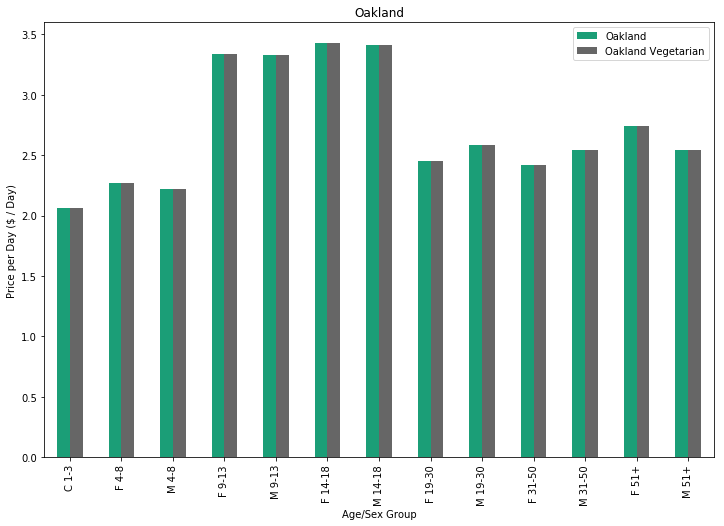

In [57]:
total_df = pd.DataFrame()
total_df["Oakland"] = oakland_df["Lowest Price Diet ($ / Day)"]
total_df["Oakland Vegetarian"] = oakland_veg_df["Lowest Price Diet ($ / Day)"]
plot = total_df.plot.bar(colormap = 'Dark2', figsize = (12,8),  title = "Oakland")
plot.set_ylabel("Price per Day ($ / Day)")

print("The average non-vegarian price per day is $" + str(np.round(sum(oakland_df["Cost per Bucket ($)"])/oakland_pop, 2)) + " compared to the vegetarian price per day of $" + str(np.round(sum(oakland_veg_df["Cost per Bucket ($)"])/oakland_pop, 2)))



The average non-vegarian price per day is $6.77 compared to the vegetarian price per day of $7.01


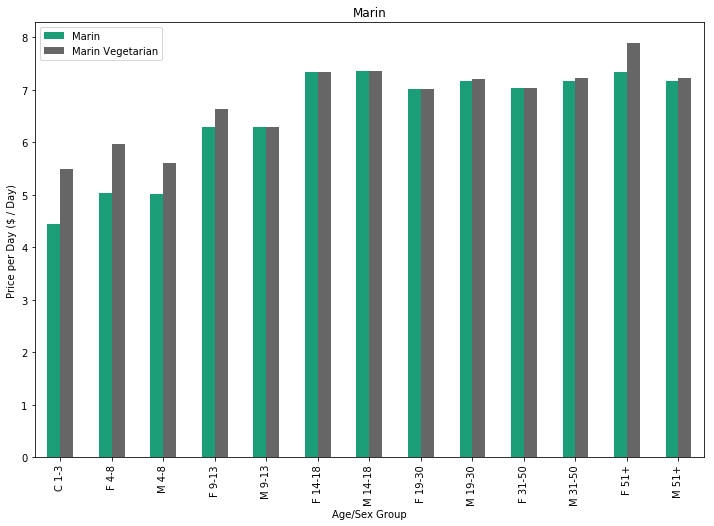

In [58]:
total_df = pd.DataFrame()
total_df["Marin"] = marin_df["Lowest Price Diet ($ / Day)"]
total_df["Marin Vegetarian"] = marin_veg_df["Lowest Price Diet ($ / Day)"]

plot = total_df.plot.bar(colormap = 'Dark2', figsize = (12,8),  title = "Marin")
plot.set_ylabel("Price per Day ($ / Day)")

print("The average non-vegarian price per day is $" + str(np.round(sum(marin_df["Cost per Bucket ($)"])/marin_pop, 2)) + " compared to the vegetarian price per day of $" + str(np.round(sum(marin_veg_df["Cost per Bucket ($)"])/marin_pop, 2)))


Text(0, 0.5, 'Price per Day ($ / Day)')

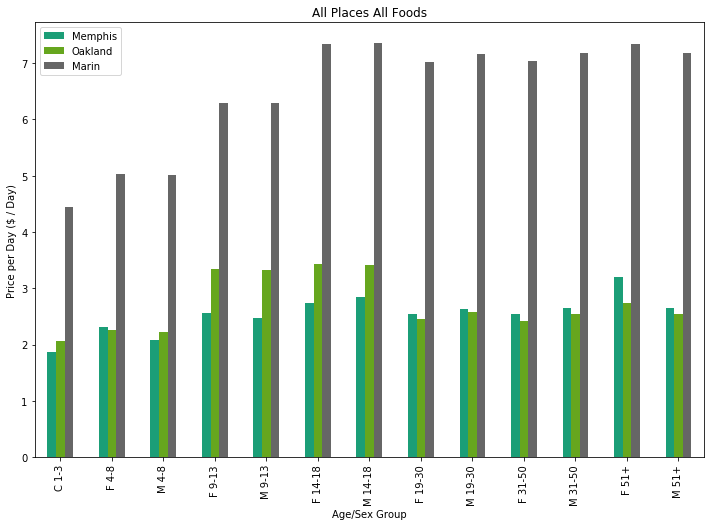

In [59]:
total_df = pd.DataFrame()
total_df["Memphis"] = memphis_df["Lowest Price Diet ($ / Day)"]
total_df["Oakland"] = oakland_df["Lowest Price Diet ($ / Day)"]
total_df["Marin"] = marin_df["Lowest Price Diet ($ / Day)"]

plot = total_df.plot.bar(colormap = 'Dark2', figsize = (12,8),  title = "All Places All Foods")
plot.set_ylabel("Price per Day ($ / Day)")

Text(0, 0.5, 'Price per Day ($ / Day)')

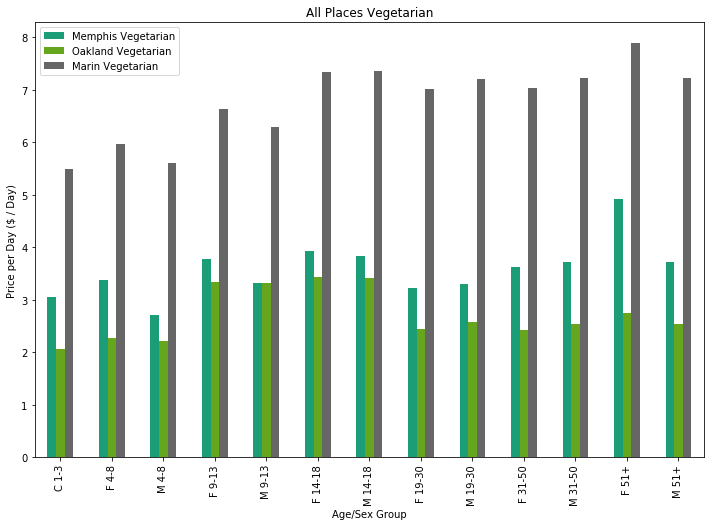

In [60]:
total_df = pd.DataFrame()
total_df["Memphis Vegetarian"] = memphis_veg_df["Lowest Price Diet ($ / Day)"]
total_df["Oakland Vegetarian"] = oakland_veg_df["Lowest Price Diet ($ / Day)"]
total_df["Marin Vegetarian"] = marin_veg_df["Lowest Price Diet ($ / Day)"]

plot = total_df.plot.bar(colormap = 'Dark2', figsize = (12,8),  title = "All Places Vegetarian")
plot.set_ylabel("Price per Day ($ / Day)")

## Effect of Produce Subsidy in Memphis

In [75]:
SHEETs = [# Memphis 10% Subsidy
          ("https://docs.google.com/spreadsheet/ccc?key=15jhkSfNsKzEGTacQChzkXA2qY66Ny_hm1u0Rwm_53yI","Vegetarian"), 
         ]

In [76]:
import ndb
import pandas as pd
import warnings

DFs = []
#for csv in CSVs:  # Uncomment to use a list of csv files as inputs
#  DFs.append(pd.read_csv(csv,dtype=str))

try:
    if len(SHEETs):
        for ID, RANGE_NAME in SHEETs:
            try:
                if "docs.google.com" in ID:
                    sheet = "%s&output=csv" % ID
                else:
                    sheet = "https://docs.google.com/spreadsheet/ccc?key=%s&output=csv" % ID
                DFs.append(pd.read_csv(sheet))
            except ParserError:
                warnings.warn("Can't read sheet at https://docs.google.com/spreadsheets/d/%s.\nCheck Sharing settings, so that anyone with link can view?" % ID)
except NameError: # SHEETS not defined?
    pass

df = pd.concat(DFs,ignore_index=True,sort=False)
# Some columns which ought to be numeric are actually str; convert them
df['Price'] = df['Price'].astype(float)
df['Quantity'] = df['Quantity'].astype(float)
df["Units"] = df["Units"].astype(str)
df["NDB"][df['Food'].str.contains("Wheat Pasta")] = str(45051131)

df

/srv/app/venv/lib/python3.6/site-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Food,Quantity,Units,Price,Date,Location,NDB,Notes
0,Wheat Pasta,16.00,oz,1.25,02/20/2019,Aldi,45051131,NaN
1,Wheat Cereal,18.00,oz,2.54,02/20/2019,Memphis Cash Saver,45175158,NaN
2,Corn Meal,5.00,lb,2.74,02/20/2019,Memphis Cash Saver,45211519,NaN
3,Rolled Oats,1.00,oz,3.28,02/20/2019,Memphis Cash Saver,45339980,NaN
4,Potatoes (Russet),1.00,lb,0.38,02/20/2019,Memphis Cash Saver,45274916,NaN
5,Spinach,10.00,oz,0.84,02/20/2019,Memphis Cash Saver,11464,NaN
6,Sweet Potatoes,1.00,lb,0.26,02/20/2019,Memphis Cash Saver,11510,NaN
7,Sugar,4.00,lb,2.45,02/20/2019,Memphis Cash Saver,19335,NaN
8,Beets,15.00,oz,0.53,02/20/2019,Memphis Cash Saver,45187703,NaN
9,Milk (Whole),128.00,oz,2.98,02/20/2019,Memphis Cash Saver,45274042,NaN


In [77]:
D = {}
for food in  df.Food.tolist():
    try:
        NDB = df.loc[df.Food==food,:].NDB
        D[food] = ndb.ndb_report(apikey[user],NDB).Quantity
    except AttributeError: 
        warnings.warn("Couldn't find NDB Code %s for food %s." % (food,NDB))
        

D = pd.DataFrame(D,dtype=float)

In [78]:
# Convert food quantities to NDB units
df['NDB Quantity'] = df[['Quantity','Units']].T.apply(lambda x : ndb.ndb_units(x['Quantity'],x['Units']))

# Now may want to filter df by time or place--need to get a unique set of food names.
df['NDB Price'] = df['Price']/df['NDB Quantity']

df.dropna(how='any') # Drop food with any missing data

# To use minimum price observed
Prices = df.groupby('Food')['NDB Price'].min()

In [79]:
# Choose sex/age group:
group = "M 19-30"

# Define *minimums*
bmin = pd.read_csv('./diet_minimums.csv').set_index('Nutrition')[group]

# Define *maximums*
bmax = pd.read_csv('./diet_maximums.csv').set_index('Nutrition')[group]

In [80]:
from  scipy.optimize import linprog as lp
import numpy as np

tol = 1e-6 # Numbers in solution smaller than this (in absolute value) treated as zeros

c = Prices.apply(lambda x:x.magnitude).dropna()

# Compile list that we have both prices and nutritional info for; drop if either missing
use = list(set(c.index.tolist()).intersection(D.columns.tolist()))
c = c[use]

# Drop nutritional information for foods we don't know the price of,
# and replace missing nutrients with zeros.
Aall = D[c.index].fillna(0)

# Drop rows of A that we don't have constraints for.
Amin = Aall.loc[bmin.index]

Amax = Aall.loc[bmax.index]

# Minimum requirements involve multiplying constraint by -1 to make <=.
A = pd.concat([-Amin,Amax])

b = pd.concat([-bmin,bmax]) # Note sign change for min constraints

# Now solve problem!
result = lp(c, A, b, method='interior-point')

# Put back into nice series
diet = pd.Series(result.x,index=c.index)

print("Cost of diet for %s is $%4.2f per day." % (group,result.fun))
print("\nYou'll be eating (in 100s of grams or milliliters):")
print(diet[diet >= tol])  # Drop items with quantities less than precision of calculation.

tab = pd.DataFrame({"Outcome":np.abs(A).dot(diet),"Recommendation":np.abs(b)})
print("\nWith the following nutritional outcomes of interest:")
print(tab)

print("\nConstraining nutrients are:")
excess = tab.diff(axis=1).iloc[:,1]
print(excess.loc[np.abs(excess) < tol].index.tolist())

Cost of diet for M 19-30 is $3.07 per day.

You'll be eating (in 100s of grams or milliliters):
Food
Bananas            1.530067
Spinach            0.165496
Lentils            0.229795
Milk (Whole)       3.403706
Canned tomatoes    3.045648
Eggs               6.611427
Corn Meal          1.182687
Sweet Potatoes     3.896203
dtype: float64

With the following nutritional outcomes of interest:
                                    Outcome  Recommendation
Nutrition                                                  
Energy                          2600.000000          2400.0
Protein                          128.808845            56.0
Fiber, total dietary              41.670047            33.6
Folate, DFE                      525.225523           400.0
Calcium, Ca                     1000.000000          1000.0
Carbohydrate, by difference      354.125072           130.0
Iron, Fe                          27.591417             8.0
Magnesium, Mg                    400.000001           400.0
Niacin

In [102]:
lowest_price_diet = []
print("The population of Memphis is " + str(memphis_pop))
for age in age_list:
    group = age
    bmin = pd.read_csv('./diet_minimums.csv').set_index('Nutrition')[group]
    bmax = pd.read_csv('./diet_maximums.csv').set_index('Nutrition')[group]
    tol = 1e-6
    c = Prices.apply(lambda x:x.magnitude).dropna()
    use = list(set(c.index.tolist()).intersection(D.columns.tolist()))
    c = c[use]
    Aall = D[c.index].fillna(0)
    Amin = Aall.loc[bmin.index]
    Amax = Aall.loc[bmax.index]
    A = pd.concat([-Amin,Amax])
    b = pd.concat([-bmin,bmax])
    result = lp(c, A, b, method='interior-point')
    diet = pd.Series(result.x,index=c.index)
    lowest_price_diet.append(result.fun)
d = {'Age/Sex Group': age_list, 'Lowest Price Diet ($ / Day)': lowest_price_diet}
total_dataframe = pd.DataFrame(data=d)
total_dataframe = total_dataframe.set_index("Age/Sex Group")
total_dataframe["Population Percentage"] = age_breakdown
total_dataframe["Population Breakdown"] = total_dataframe["Population Percentage"] / 100 * memphis_pop
total_dataframe["Cost per Bucket ($)"] = total_dataframe["Population Breakdown"] * total_dataframe["Lowest Price Diet ($ / Day)"]
total_cost = np.round(sum(total_dataframe["Cost per Bucket ($)"]))
print("The total minimum cost to feed this population is $" + str(total_cost)\
      + " per day and an average cost of $" + str(np.round(total_cost/memphis_pop, 2)) + " per person")
memphis_20_df = total_dataframe
memphis_20_df


The population of Memphis is 670000
The total minimum cost to feed this population is $2277716.0 per day and an average cost of $3.4 per person


,Lowest Price Diet ($ / Day),Population Percentage,Population Breakdown,Cost per Bucket ($)
Age/Sex Group,,,,
C 1-3,2.949347,6.82,45694.0,134767.439024
F 4-8,3.053964,3.56,23852.0,72843.139363
M 4-8,2.548350,3.74,25058.0,63856.563124
F 9-13,3.431094,3.56,23852.0,81838.449955
M 9-13,3.068341,3.74,25058.0,76886.485461
F 14-18,3.558088,3.49,23383.0,83198.769808
M 14-18,3.534601,3.69,24723.0,87385.950764
F 19-30,2.953549,6.71,44957.0,132782.722619
M 19-30,3.072515,6.92,46364.0,142454.089130


The average vegarian price per day is $3.72 compared to the subsidized vegetarian price per day of $3.4


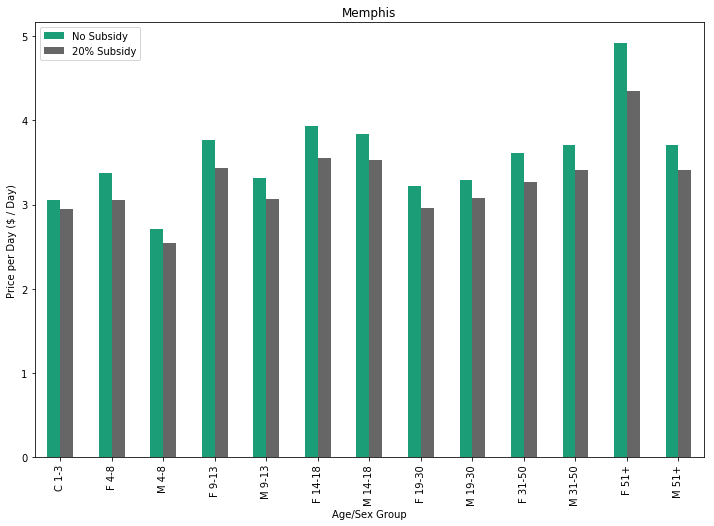

In [103]:
total_df = pd.DataFrame()
total_df["No Subsidy"] = memphis_veg_df["Lowest Price Diet ($ / Day)"]
total_df["20% Subsidy"] = memphis_20_df["Lowest Price Diet ($ / Day)"]
plot = total_df.plot.bar(colormap = 'Dark2', figsize = (12,8),  title = "Memphis")
plot.set_ylabel("Price per Day ($ / Day)")

print("The average vegarian price per day is $" + str(np.round(sum(memphis_veg_df["Cost per Bucket ($)"])/memphis_pop, 2)) + " compared to the subsidized vegetarian price per day of $" + str(np.round(sum(memphis_20_df["Cost per Bucket ($)"])/memphis_pop, 2)))



The average price reduction is 8.1%


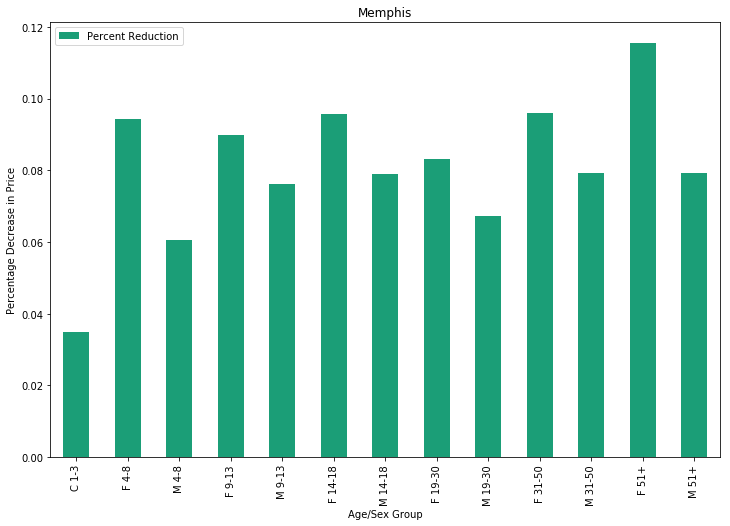

In [104]:
total_df = pd.DataFrame()
total_df["Percent Reduction"] = (memphis_veg_df["Lowest Price Diet ($ / Day)"] - memphis_20_df["Lowest Price Diet ($ / Day)"]) / memphis_veg_df["Lowest Price Diet ($ / Day)"]
plot = total_df.plot.bar(colormap = 'Dark2', figsize = (12,8),  title = "Memphis")
plot.set_ylabel("Percentage Decrease in Price")

print("The average price reduction is " + str(np.round(np.mean((memphis_veg_df["Lowest Price Diet ($ / Day)"] - memphis_20_df["Lowest Price Diet ($ / Day)"]) / memphis_veg_df["Lowest Price Diet ($ / Day)"]), 3) * 100) + "%")

